# Datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn import datasets

In [15]:
COLORS = [plt.cm.viridis(0), 'teal', 'goldenrod']
COLORMAP = lambda x: [COLORS[int(xi)] for xi in x]

In [16]:
def plot_dataset_2D(data, labels):
    d_1 = data[labels==0]
    d_2 = data[labels==1]
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))        
    ax[0].scatter(x=data[:,0], y=data[:,1], s=5, alpha=0.6, c=COLORMAP(labels))
    bins_x = np.linspace(min(min(d_1[:,0]), min(d_2[:,0])), max(max(d_1[:,0]), max(d_2[:,0])), 50)
    bins_y = np.linspace(min(min(d_1[:,1]), min(d_2[:,1])), max(max(d_1[:,1]), max(d_2[:,1])), 50)
    
    ax[1].hist(d_1[:,0], bins_x, alpha = 0.5, color=COLORS[0], label='dim x, class 0')
    ax[1].hist(d_2[:,0], bins_x, alpha = 0.5, color=COLORS[1], label='dim x, class 1')
    ax[1].legend()
    
    ax[2].hist(d_1[:,1], bins_y, alpha = 0.5, color=COLORS[0], label='dim y, class 0')
    ax[2].hist(d_2[:,1], bins_y, alpha = 0.5, color=COLORS[1], label='dim y, class 1')
    ax[2].legend()

    plt.show()

In [5]:
def generateData_twoPills_2D(dataset_size, noise=0.05):
    data, labels = make_classification(
        n_samples=max(10000, dataset_size),
        n_features=3,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        n_clusters_per_class=1,
        flip_y=noise,  # noise
        random_state=2210)
    # the axis order changes if the noise parameter is adjusted. For the experiments on noise, we
    # set the correct order here such that the dataset always is mainly the same
    switcher={
        0: (2,1),
        0.05: (0,1),
        0.1: (1,0),
        0.2: (2,0),
        0.5: (2,1)
    }
    data = data[0:dataset_size, switcher.get(noise, (0,1))]        # cut away dummy dimension
    labels = labels[0:dataset_size]
    return data, labels

In [17]:
#data, labels = generateData_twoPills_2D(10000)
#plot_dataset_2D(data, labels)

In [7]:
def generateData_twoPills_noNoise_2D(dataset_size):
    data, labels = make_classification(
        n_samples=max(10000, dataset_size),
        n_features=3,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        n_clusters_per_class=1,
        flip_y=0,  # noise
        random_state=2210)
    data = data[0:dataset_size, (2,1)]        # cut away dummy dimension
    labels = labels[0:dataset_size]
    return data, labels

In [8]:
def generateData_threePills_2D(dataset_size):
    data, labels = make_classification(
        n_samples=max(10000, dataset_size),
        n_features=3,
        n_informative=2,
        n_redundant=0,
        n_classes=3,
        n_clusters_per_class=1,
        flip_y=0.05,  # noise
        random_state=2210)
    data = data[0:dataset_size, (1, 2)]        # cut away dummy dimension
    labels = labels[0:dataset_size]
    return data, labels

In [9]:
def generateData_twoPills_noNoise_3D(dataset_size):
    data, labels = make_classification(
        n_samples=max(10000, dataset_size),
        n_features=4,
        n_informative=3,
        n_redundant=0,
        n_classes=2,
        n_clusters_per_class=1,
        flip_y=0,  # noise
        random_state=2210)
    data = data[0:dataset_size, (0,1,2)]        # cut away dummy dimension
    labels = labels[0:dataset_size]
    return data, labels

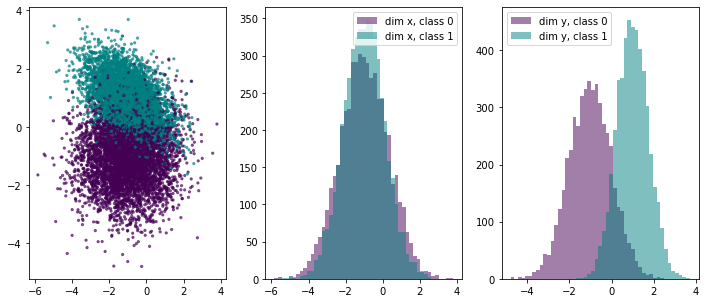

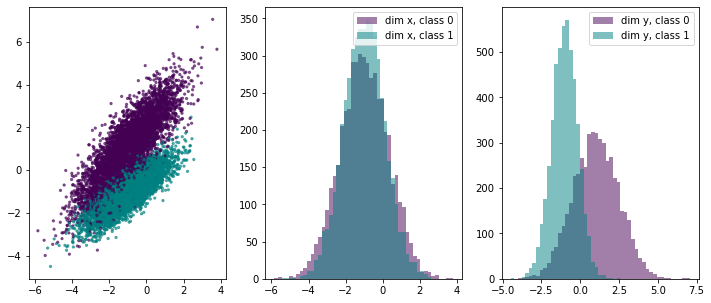

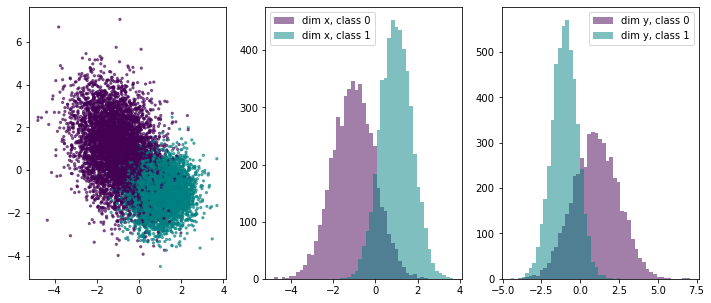

In [10]:
#data, labels = generateData_twoPills_noNoise_3D(10000)
#plot_dataset_2D(data[:,(0,1)], labels)
#plot_dataset_2D(data[:,(0,2)], labels)
#plot_dataset_2D(data[:,(1,2)], labels)

In [11]:
def generateData_normal_2D(dataset_size):
    size = dataset_size // 2
    R_x = np.random.normal(loc=0.5, scale=0.2, size=size)
    R_y = np.random.normal(loc=0, scale=0.4, size=size)
    R = np.append(R_x, R_y, axis=0).reshape(2, size).transpose()
    L_x = np.random.normal(loc=-0.5, scale=0.2, size=size)
    L_y = np.random.normal(loc=0, scale=0.4, size=size)
    L = np.append(L_x, L_y, axis=0).reshape(2, size).transpose()
    data = np.concatenate((R, L))
    labels = np.append([0]*size, [1]*size)
    return data, labels

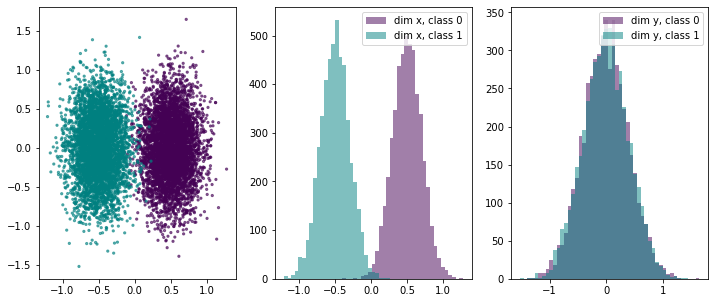

In [12]:
#data, labels = generateData_normal_2D(10000)
#plot_dataset_2D(data, labels)

In [13]:
def loadData_iris(dataset_size=150):
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    size = min(dataset_size, len(y))
    return X[0:size,:], y[0:size]

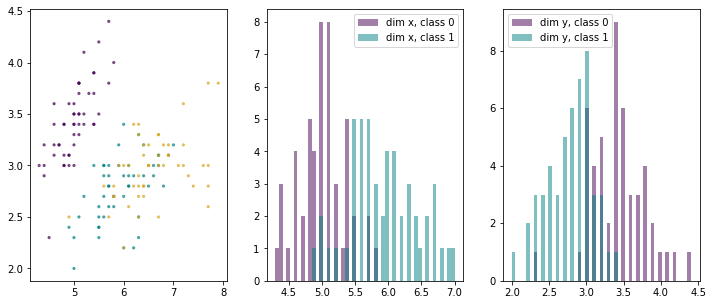

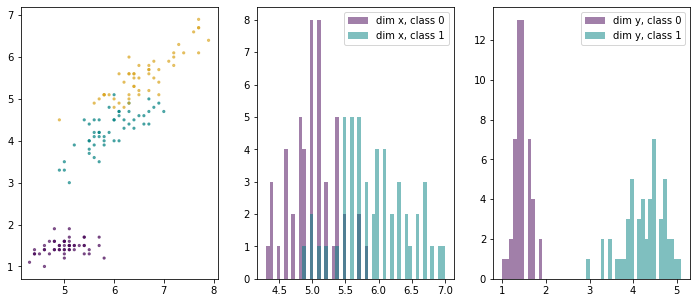

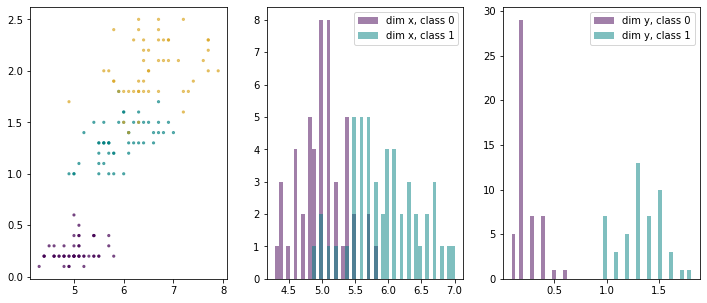

In [14]:
#data, labels = loadData_iris()
#plot_dataset_2D(data[:,(0,1)], labels)
#plot_dataset_2D(data[:,(0,2)], labels)
#plot_dataset_2D(data[:,(0,3)], labels)